In [1]:
## compile PyGL for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

running install
running build
running build_py
running build_ext
running install_lib
running install_egg_info
Removing /data/septal/rs2004/software/anaconda/lib/python3.7/site-packages/pygl-1.0.0-py3.7.egg-info
Writing /data/septal/rs2004/software/anaconda/lib/python3.7/site-packages/pygl-1.0.0-py3.7.egg-info


The diffusive dynamics of a conserved scalar order parameter $\phi$ is described by the following equation

$$
\dot{\phi}	+\boldsymbol{\nabla}\cdot\mathbf{J}=0.
$$
Here $\mathbf J$ is 
$$
\mathbf{J}	=-M\boldsymbol{\nabla}\mu+\sqrt{2DM}\boldsymbol{\Lambda},
\\
\mu=\frac{\delta\mathcal{F}}{\delta\phi}.
$$
The free energy is given as

$$
\mathcal{F}=\int\left(\frac{a}{2}\phi^{2}+\frac{b}{4}\phi^{4}+\frac{\kappa}{2}(\boldsymbol{\nabla}\phi)^{2}\right)d\boldsymbol{r}.
$$

Here $b>0$ and $\kappa >0$ for stability. The system will phase separate if $a<0$. This becomes clear from looking at the plot of the free energy.

In [2]:
%matplotlib inline
import pygl, numpy as np
import scipy as sp
import matplotlib.pyplot as plt

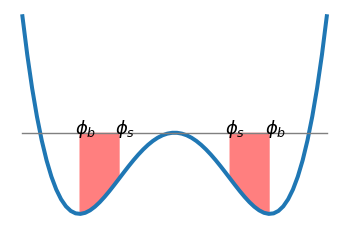

In [3]:
def f(a, b, phi):
    return 0.5*a*phi**2 + 0.25*b*phi**4

phi = np.linspace(-1.6, 1.6, 64)
a, b = -0.25, 0.25

phi_s = np.sqrt(-a/(3*b))
phi_b = np.sqrt(-a/(b))

plt.plot(phi, f(a, b, phi), lw=4); plt.plot(phi, 0*phi, 'grey', lw=1.4);  plt.axis('off');

plt.annotate('$\phi_s$', (phi_s-0.05, 0), fontsize=18); plt.annotate('$\phi_s$', (-phi_s-0.05, 0), fontsize=18)
plt.annotate('$\phi_b$', (phi_b-0.05, 0), fontsize=18); plt.annotate('$\phi_b$', (-phi_b-0.05, 0), fontsize=18)

x = np.linspace(-phi_b, -phi_s, 32);  plt.fill_between(x, f(a, b, x), facecolor='red', alpha=0.5)
x = np.linspace(phi_s, phi_b, 32);    plt.fill_between(x, f(a, b, x), facecolor='red', alpha=0.5);

In the shaded region, the free energy is metstable and droplets forms if there is noise in the system. We first study the unstable region between these shaded region, where phase separation happens even in absence of noise. 

In [4]:
a, b, k   = -.25, .25, 1
N, T, dt  = 64, 50000, 0.01

class pdeSolver():
    '''
    Class to solve a PDE
    '''
    def rhs(self, L, u):
        return L*(a*u + b*u*u*u - k*L*u)

       
    def integrate(self, L, u):
        '''  solves the equation and plots it at differnt instants '''
        f = plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k');    
        
        # now evolve the system in time using Euler
        for i in range(T):          
            u = u + dt*self.rhs(L, u)
            
            if (i==0):             self.configPlot(u, f, 1, i);
            if (i==int(T/6)):      self.configPlot(u, f, 2, i);
            if (i==int(T/4)):      self.configPlot(u, f, 3, i);
            if (i==int(T/3)):      self.configPlot(u, f, 4, i);
            if (i==int(T/2)):      self.configPlot(u, f, 5, i);
            if (i==T-1):           self.configPlot(u, f, 6, i);
     
    
    def configPlot(self, u, f, n_, i):
        U= u.reshape((N,N)); sp =  f.add_subplot(3, 3, n_ )  
        
        plt.pcolormesh(U, cmap=plt.cm.RdBu_r); 
        
        plt.axis('off'); plt.title('T = %1.2E'%(i))
plt.show()

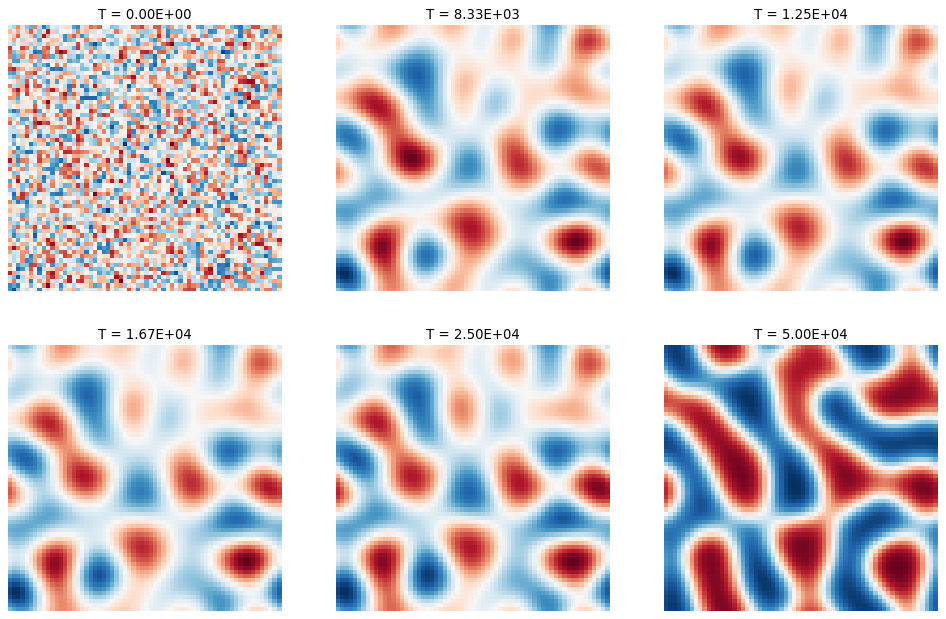

In [5]:
rm = pdeSolver()   # instantiate the class

# Initial data
u= 0.1*(1-2*np.random.random(N*N))

# construct the laplacian using PyGL
dim, h, st = 2, 1, 5
fd  = pygl.dms.FD(N, st, h)
D22=fd.diffmat(2); I=sp.sparse.identity(N)
L  = sp.sparse.kron(D22, I) + sp.sparse.kron(I, D22)

# Integrate and plot the data
rm.integrate(L, u)